In [17]:
# Method of Moments
# https://radzion.com/blog/probability/method
from random import choice
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Task: calculate the population distribution function's parameters 
# having a distribution function and sample data. 

In [18]:
# Estimating rule: $\tilde{m}_{nx}$
expected_value = lambda values: sum(values) / len(values) # mean estimation
standard_deviation = lambda values, expected_value: np.sqrt(sum([(v - expected_value)**2 for v in values])  / len(values))
# std estimation

overall population: tilde(m)underscore(nx) estimates
            expected value: 39.002535021979135 
        standard deviation: 1.000872831275956
    


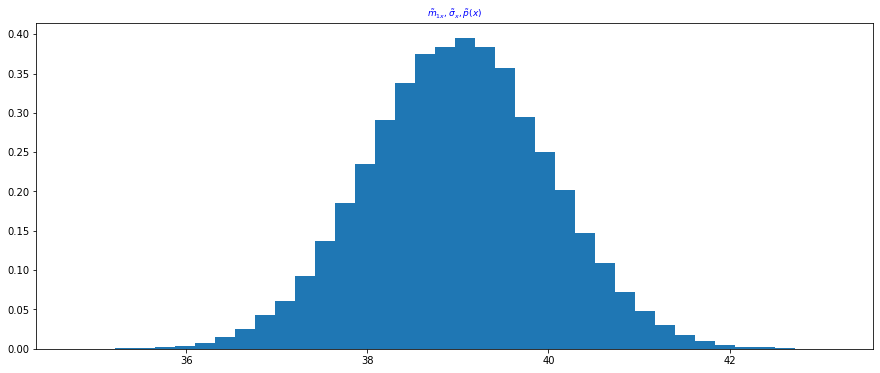

In [26]:
# population with a specific distribution: Gaussian(mu, sigma)
### # population with a specific distribution: poisson(lamb)
np.random.seed(1) #
Nmodel = 2**16 # a large size simulating the theorical pdf model 
# $\theta_i= mu, sigma $ - parameters of pdf
mu, sigma = 39, 1 # actual values of $\theta_i$
population = np.random.normal(mu, sigma, Nmodel) # model simulation of pdf
### population = np.random.poisson(mu, Nmodel) # model simulation of pdf, fix mu=1

# $\tilde{m}_{nx}$ estimates of $\theta_i$  
mean = expected_value(population)
std = standard_deviation(population, mean)
# Histogram of population
Nbins = int(np.ceil(1 + 3.3*np.log(Nmodel))) # Sturge’s Rule K = 1 + 3. 322 logN

print(
    '''overall population: tilde(m)underscore(nx) estimates
            expected value: {0} 
        standard deviation: {1}
    '''.format(mean, std)
)
plt.figure(figsize=(15, 6))
plt.hist(population, Nbins, density=True)
plt.title( r'$\tilde{m}_{1x}, \tilde{\sigma}_x, \tilde{p}(x)$',
          fontsize=9, color='blue')
plt.show()

randomly selected items: hat(m)underscore(nx) estimates
            expected value: 38.83338530524429
            standard deviation: 0.9985873937557214
    


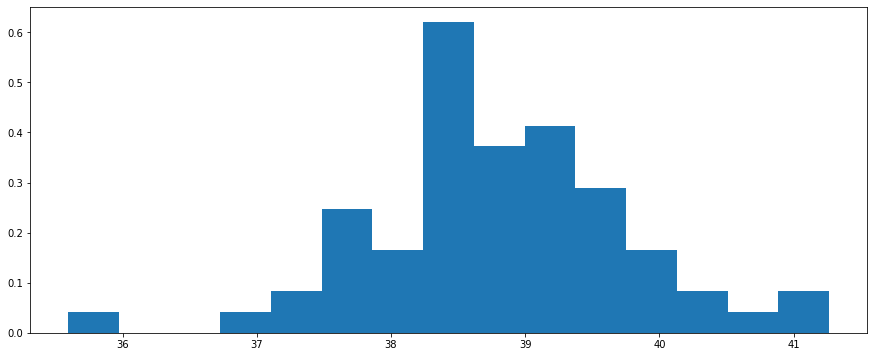

In [27]:
# Generic calculation for d parameters of the population distribution function:

# 1- Compute all n-moments of the sample, n=1,...,d.
#    Fix the sample size
Nsample = 2**6 # 2**4,5,6,7,8 - tested values of Nsample
Nbins = int(np.ceil(1 + 3.3*np.log(Nsample)))   
#    selected sample data (random choise)
randomly_selected_items = [choice(population) for _ in range(Nsample)]
# 3- Calculate the population distribution parameters by solving equations
#    using the previously computed n-moments.
#    see the estimating rule for d= 1 (expected_value), 2(standard_deviation)

mean = expected_value(randomly_selected_items)          # n=1
s_d = standard_deviation(randomly_selected_items, mean) # n= 2
print(
    '''randomly selected items: hat(m)underscore(nx) estimates
            expected value: {0}
            standard deviation: {1}
    '''.format(mean, s_d))
# histogram of selected sample
plt.figure(figsize=(15, 6))
plt.hist(randomly_selected_items, Nbins, density=True)
plt.show()

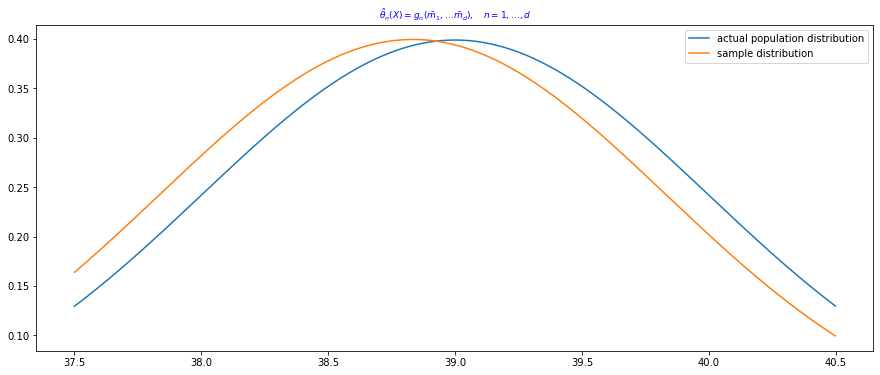

In [28]:
# fitting of sampled values
xs = np.arange(mu-1.5*sigma, mu +1.5*sigma, 0.001)
# for comparison, the actual Gaussian pdf is also plotted
actual_ys = norm.pdf(xs, mu, sigma)
ys = norm.pdf(xs, mean, s_d)
plt.figure(figsize=(15, 6))
plt.plot(xs, actual_ys, label='actual population distribution')
plt.plot(xs, ys, label='sample distribution')
plt.legend()
plt.title(r'$\tilde{\theta}_n(X) = g_n(\bar{m}_1,\ldots \bar{m}_d), \quad n= 1,\dots, d}$',
          fontsize=9, color='blue')
plt.show()